In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import ModelCheckpoint

# As the dataset is divided into folders
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
w,h = 400,400
batch_size = 32

train_path = "C:/Users/77081/Code/predict_pneumonia/model/datasets/train"
test_path = "C:/Users/77081/Code/predict_pneumonia/model/datasets/test"
val_path = "C:/Users/77081/Code/predict_pneumonia/model/datasets/val"

train_img_gen = ImageDataGenerator(
    rescale = 1.0/255,
    zoom_range=0.3
)

test_img_gen = ImageDataGenerator(
    rescale = 1.0/255
)

val_img_gen = ImageDataGenerator(
    rescale = 1.0/255
)

train_dataset = train_img_gen.flow_from_directory(
    train_path,
    target_size = (w,h),
    batch_size = batch_size,
    class_mode = 'categorical',
    shuffle = True
)

test_dataset = test_img_gen.flow_from_directory(
    test_path,
    target_size = (w,h),
    batch_size = batch_size,
    class_mode = 'categorical',
    shuffle = False
)

val_dataset = val_img_gen.flow_from_directory(
    val_path,
    target_size = (w,h),
    batch_size = batch_size,
    class_mode = 'categorical',
    shuffle = False
)

Found 6326 images belonging to 4 classes.
Found 771 images belonging to 4 classes.
Found 38 images belonging to 4 classes.


In [4]:
train_dataset.class_indices

{'COVID19': 0, 'NORMAL': 1, 'PNEUMONIA': 2, 'TURBERCULOSIS': 3}

(32, 400, 400, 3)


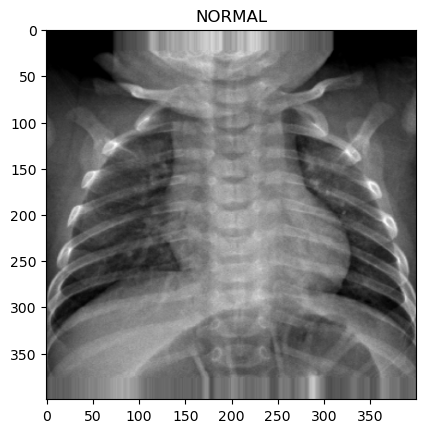

(32, 400, 400, 3)


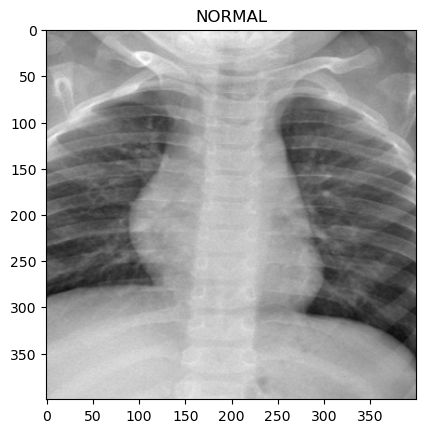

(32, 400, 400, 3)


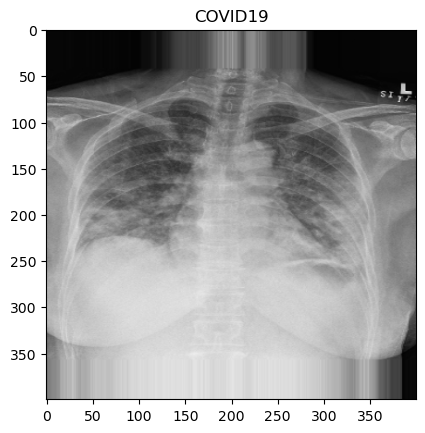

(32, 400, 400, 3)


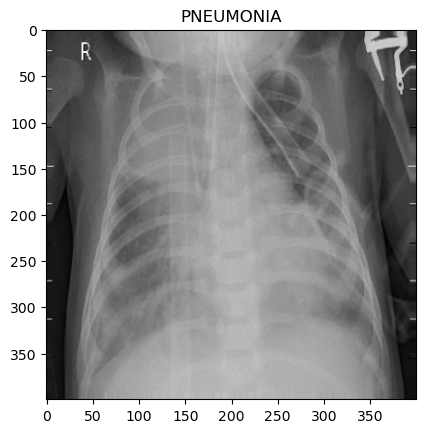

(32, 400, 400, 3)


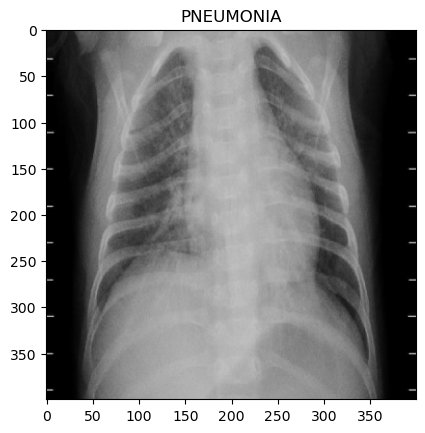

In [5]:
classes = ['COVID19', 'NORMAL','PNEUMONIA','TB']

for _ in range(5):
    img,label = train_dataset.next()
    print(img.shape)
    plt.title(classes[np.argmax(label[0])])
    plt.imshow(img[0])
    plt.show()

In [6]:
train_dataset.image_shape

(400, 400, 3)

In [7]:
model = models.Sequential()
model.add(layers.Conv2D(64,(3,3), activation = 'relu', input_shape=(w,h,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation ='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())

model.add(layers.Dense(128, activation ='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(4,activation='softmax'))

model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

model.summary()




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 398, 398, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 199, 199, 64)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 197, 197, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 98, 98, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 96, 96, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 48, 48, 128)     

In [10]:
resnetModel = models.Sequential()

ResNet_101_V2 = tf.keras.applications.ResNet101V2(
                include_top = False,
                weights='imagenet',
                input_shape=(w,h,3),
                pooling='max',
                classes=4
            )
for layer in ResNet_101_V2.layers:
    layer.trainable = False
    
resnetModel.add(ResNet_101_V2)
resnetModel.add(layers.Flatten())
resnetModel.add(layers.Dense(512, activation='relu'))
resnetModel.add(layers.Dense(4, activation='softmax'))

resnetModel.compile(optimizer ='adam',loss='categorical_crossentropy',metrics=['accuracy'])

resnetModel.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet101v2 (Functional)    (None, 2048)              42626560  
                                                                 
 flatten_1 (Flatten)         (None, 2048)              0         
                                                                 
 dense_2 (Dense)             (None, 512)               1049088   
                                                                 
 dense_3 (Dense)             (None, 4)                 2052      
                                                                 
Total params: 43677700 (166.62 MB)
Trainable params: 1051140 (4.01 MB)
Non-trainable params: 42626560 (162.61 MB)
_________________________________________________________________


In [11]:
weight_path = "C:/Users/77081/Code/predict_pneumonia/model/datasets/"

model_checkpoint = ModelCheckpoint(
    filepath= weight_path,
    save_best_only = True,
    save_weights_only =True,
    mode ="max",
    monitor = 'val_accuracy'
)
    

In [12]:
history = resnetModel.fit(train_dataset,epochs=10,validation_data=val_dataset,callbacks=[model_checkpoint])

Epoch 1/10


198/198 [==============================] - 681s 3s/step - loss: 3.1862 - accuracy: 0.8328 - val_loss: 0.4829 - val_accuracy: 0.8158
Epoch 2/10
198/198 [==============================] - 676s 3s/step - loss: 0.2505 - accuracy: 0.9159 - val_loss: 0.4148 - val_accuracy: 0.8158
Epoch 3/10
198/198 [==============================] - 679s 3s/step - loss: 0.2359 - accuracy: 0.9167 - val_loss: 0.4119 - val_accuracy: 0.8684
Epoch 4/10
198/198 [==============================] - 679s 3s/step - loss: 0.1906 - accuracy: 0.9316 - val_loss: 0.3752 - val_accuracy: 0.8684
Epoch 5/10
198/198 [==============================] - 683s 3s/step - loss: 0.1626 - accuracy: 0.9415 - val_loss: 0.3730 - val_accuracy: 0.8421
Epoch 6/10
198/198 [==============================] - 687s 3s/step - loss: 0.1685 - accuracy: 0.9404 - val_loss: 0.3705 - val_accuracy: 0.8684
Epoch 7/10
198/198 [==============================] - 683s 3s/step - loss: 0.1436 - accuracy: 0.9491 - val_loss: 0.3858 - val_accuracy: 0.81

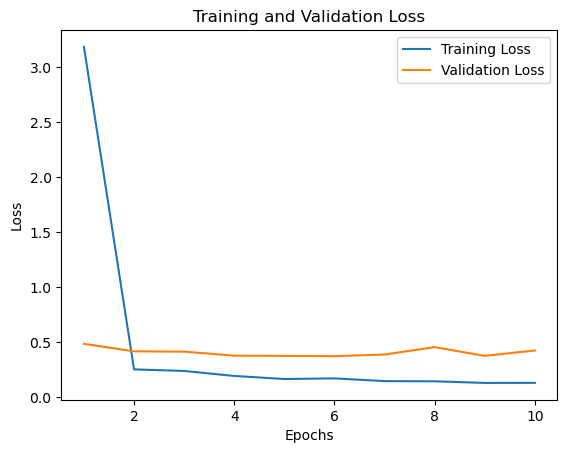

In [13]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = len(history.history['loss'])
# Plot the loss and val_loss
epochs_range = range(1, epochs + 1)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [14]:
resnetModel.load_weights(weight_path)

# make predictions
predictions = resnetModel.predict(test_dataset)
predictions

25/25 [==============================] - 81s 3s/step


array([[9.9990678e-01, 6.6744339e-09, 9.2369162e-05, 7.7478194e-07],
       [9.7252607e-01, 2.3320130e-05, 2.7450459e-02, 2.6587961e-07],
       [9.9932599e-01, 5.9600188e-05, 5.4992654e-04, 6.4476051e-05],
       ...,
       [6.6139614e-06, 4.7598449e-13, 9.5831485e-09, 9.9999332e-01],
       [1.1888016e-03, 7.0797013e-10, 1.2655680e-05, 9.9879849e-01],
       [2.1776486e-02, 6.7679549e-11, 1.5440810e-04, 9.7806907e-01]],
      dtype=float32)

In [15]:
predicted_class = np.argmax(predictions, axis=1)

              precision    recall  f1-score   support

           0       0.99      0.94      0.97       106
           1       0.88      0.82      0.85       234
           2       0.89      0.94      0.92       390
           3       0.97      0.93      0.95        41

    accuracy                           0.91       771
   macro avg       0.93      0.91      0.92       771
weighted avg       0.91      0.91      0.90       771

{'COVID19': 0, 'NORMAL': 1, 'PNEUMONIA': 2, 'TURBERCULOSIS': 3}


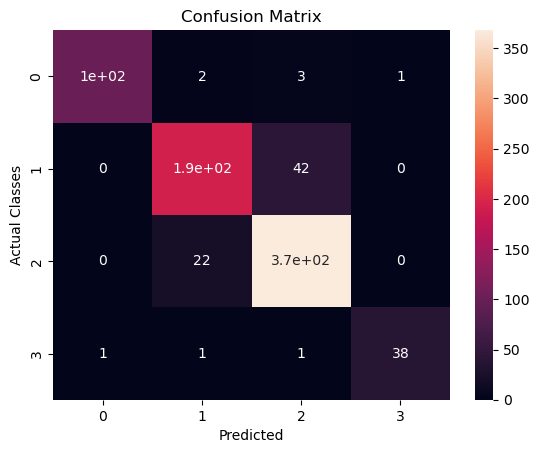

In [16]:
from sklearn.metrics import confusion_matrix, classification_report

true_labels = test_dataset.classes

sns.heatmap(confusion_matrix(true_labels, predicted_class), annot=True)

# Print classification report
print(classification_report(true_labels, predicted_class))
print(test_dataset.class_indices)

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual Classes')
plt.show()

In [17]:
import joblib

# Предполагая, что 'predictions' содержит выходные предсказания вашей модели ResNet
predictions = resnetModel.predict(test_dataset)

# Сохранение предсказаний в файле формата pickle
joblib.dump(predictions, 'saved_model.pkl')


25/25 [==============================] - 80s 3s/step


['saved_model.pkl']

In [18]:
import json

# Ваш словарь class_dict
class_dict = {'COVID19': 0, 'NORMAL': 1, 'PNEUMONIA': 2, 'TB': 3}

# Сохранение словаря в файл JSON
with open("class_dictionary.json", "w") as json_file:
    json.dump(class_dict, json_file)


1/1 [==============================] - 0s 188ms/step
Predicted class: COVID19


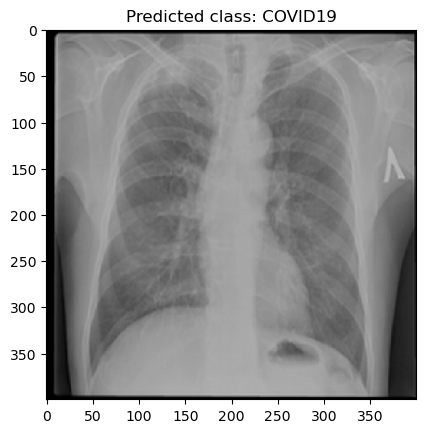

In [25]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt


def classify_image(image_path):
    
    # Загрузка изображения и предобработка
    img = image.load_img(image_path, target_size=(w, h))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0  

    # Получение предсказания от модели
    prediction = resnetModel.predict(img_array)

    # Преобразование предсказания в метку класса
    predicted_class = classes[np.argmax(prediction)]

    # Вывод результата
    print("Predicted class:", predicted_class)

    # Отображение изображения
    plt.imshow(img)
    plt.title("Predicted class: " + predicted_class)
    plt.show()

# Пример использования
image_path_to_check = r"C:\Users\77081\Code\predict_pneumonia\model\datasets\test_images\Tuberculosis-5.png"
classify_image(image_path_to_check)
